### Please install the required Python modules/SDKs

In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

Could not find conda environment: ai-azure-c1
You can list all discoverable environments with `conda info --envs`.



In [2]:
!pip install Pillow==8.4

In [3]:

import sys
import requests
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials


import matplotlib.pyplot as plt

### Utilitiy Functions

In [4]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()
    
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(20,10))
    plt.imshow(image_object)
    plt.show()
    
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

### TODO: Accessing Specific Azure Resources 

In [5]:
KEY = "71307f07768144d6a76ee103b05d321d"
ENDPOINT = "https://nayana-face-api.cognitiveservices.azure.com/"

# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

### TODO: Setting Image URLs

In [6]:
image_01 = "https://cdn.theatlantic.com/thumbor/qf3OZxABtwdkxsPxNl_l-pbFyYY=/2733x1:4028x1296/1080x1080/media/img/mt/2020/10/Dwight_comop/original.jpg"
image_02 = "https://scontent-ams4-1.xx.fbcdn.net/v/t1.6435-9/71090716_10157702628907422_4297543851175837696_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=730e14&_nc_ohc=azWTzRXciKQAX-My8Ag&_nc_ht=scontent-ams4-1.xx&oh=00_AT_EwliV_HD2khQeOSFTPTO4MVIZW3mw2oEByCldOC6i_Q&oe=62BE987F"

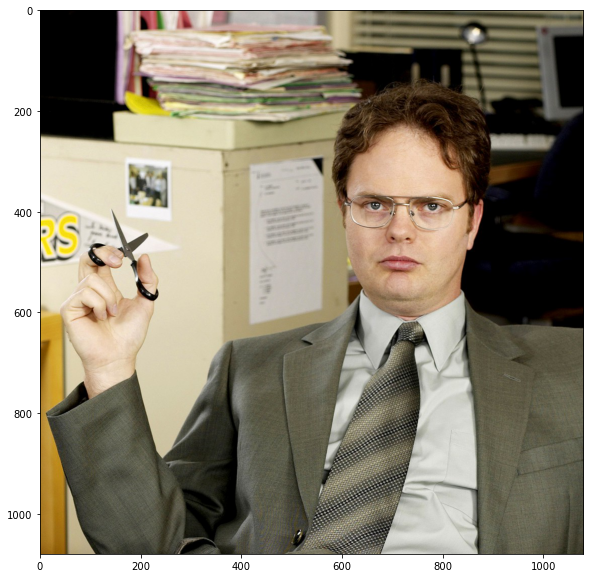

In [7]:
show_image_in_cell(image_01)

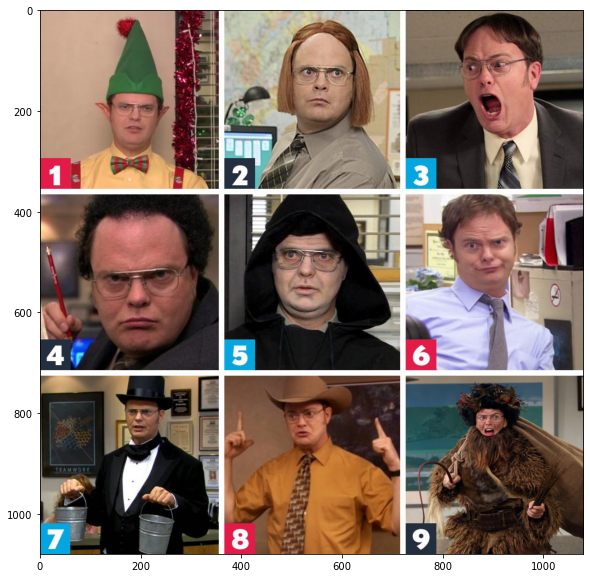

In [8]:
show_image_in_cell(image_02)

## Using Face - Detect API to Extract Face Attributes
### TODO: Detect Face from an image
In the cell below, add a few more face attributes in the `return_face_attributes` section. You can find valid attributes in this Azure [`detect_with_url` documentation](https://docs.microsoft.com/en-us/rest/api/faceapi/face/detect-with-url#faceattributes).

In [9]:
# Detect Face from an image
def detect_face_with_attributes_02_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url, 
                                                     return_face_attributes=[
        # Todo: add more face attributes
                'headPose',
                'age',
                'gender',
                'smile',
                'facialHair',
                'glasses',
                'emotion',
                'hair',
                'makeup',
                'occlusion',
                'accessories',
                'blur',
                'exposure',
                'noise'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

#### Detect Face In the First Image

In [10]:
detected_faces_01_object = detect_face_with_attributes_02_from_any_url(image_01)

Total face(s) detected  from 1


In [11]:
for face in detected_faces_01_object: 
    print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': 1.7, 'yaw': -2.5, 'pitch': -0.9}


#### Detect Face In the Second Image

In [12]:
detected_faces_02_object = detect_face_with_attributes_02_from_any_url(image_02)

Total face(s) detected  from 9


In [13]:
for face in detected_faces_02_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': -5.2, 'yaw': -8.7, 'pitch': -8.4}
{'additional_properties': {}, 'roll': 0.7, 'yaw': -2.0, 'pitch': 0.7}
{'additional_properties': {}, 'roll': -6.6, 'yaw': -20.4, 'pitch': 2.6}
{'additional_properties': {}, 'roll': 4.0, 'yaw': 0.3, 'pitch': 9.5}
{'additional_properties': {}, 'roll': -3.7, 'yaw': 4.0, 'pitch': -4.3}
{'additional_properties': {}, 'roll': 3.9, 'yaw': 3.5, 'pitch': 1.1}
{'additional_properties': {}, 'roll': -5.1, 'yaw': -18.1, 'pitch': -6.1}
{'additional_properties': {}, 'roll': 1.1, 'yaw': -12.7, 'pitch': -6.0}
{'additional_properties': {}, 'roll': -1.0, 'yaw': -6.6, 'pitch': 0.3}


### TODO: Extracting More Face Attributes From the Face Detect API Result

In [14]:
# Todo: change the attributes based on your settings
for face in detected_faces_01_object: 
    print (face.face_attributes.age)
    print (face.face_attributes.emotion)
    print (face.face_attributes.gender)
    print (face.face_attributes.accessories)
    print (face.face_attributes.smile)
    print (face.face_attributes.hair)

36.0
{'additional_properties': {}, 'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.0, 'neutral': 0.999, 'sadness': 0.0, 'surprise': 0.0}
Gender.male
0.0
{'additional_properties': {}, 'bald': 0.05, 'invisible': False, 'hair_color': [<azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688b580>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688ba60>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688bac0>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688bb20>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688bb80>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688bbe0>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7f8e0688bc40>]}


In [15]:
# Extracting Hair color attributes from the Face Detect API result
for face in detected_faces_01_object: 
    for each_hair_color in face.face_attributes.hair.hair_color:
        print (each_hair_color)

{'additional_properties': {}, 'color': <HairColorType.brown: 'brown'>, 'confidence': 1.0}
{'additional_properties': {}, 'color': <HairColorType.black: 'black'>, 'confidence': 0.81}
{'additional_properties': {}, 'color': <HairColorType.red: 'red'>, 'confidence': 0.24}
{'additional_properties': {}, 'color': <HairColorType.gray: 'gray'>, 'confidence': 0.14}
{'additional_properties': {}, 'color': <HairColorType.blond: 'blond'>, 'confidence': 0.09}
{'additional_properties': {}, 'color': <HairColorType.other: 'other'>, 'confidence': 0.03}
{'additional_properties': {}, 'color': <HairColorType.white: 'white'>, 'confidence': 0.0}


## Using Find Similar API

In [16]:
# Todo: add the image urls
face_image = "https://cdn.theatlantic.com/thumbor/qf3OZxABtwdkxsPxNl_l-pbFyYY=/2733x1:4028x1296/1080x1080/media/img/mt/2020/10/Dwight_comop/original.jpg"
group_image = "https://scontent-ams4-1.xx.fbcdn.net/v/t1.6435-9/71090716_10157702628907422_4297543851175837696_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=730e14&_nc_ohc=azWTzRXciKQAX-My8Ag&_nc_ht=scontent-ams4-1.xx&oh=00_AT_EwliV_HD2khQeOSFTPTO4MVIZW3mw2oEByCldOC6i_Q&oe=62BE987F"

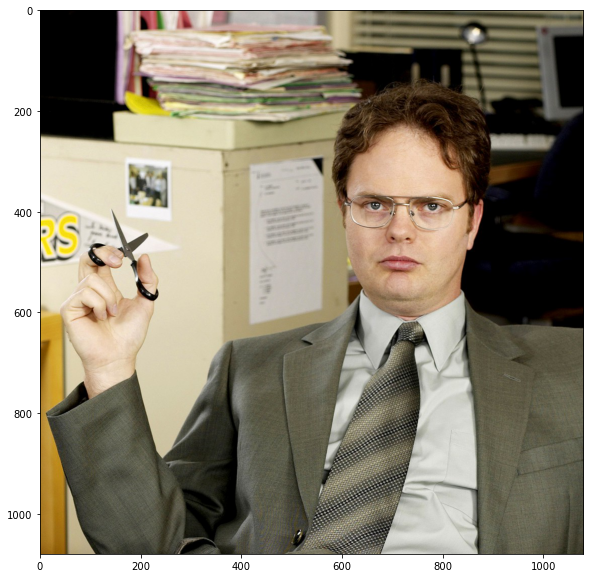

In [17]:
show_image_in_cell(face_image)

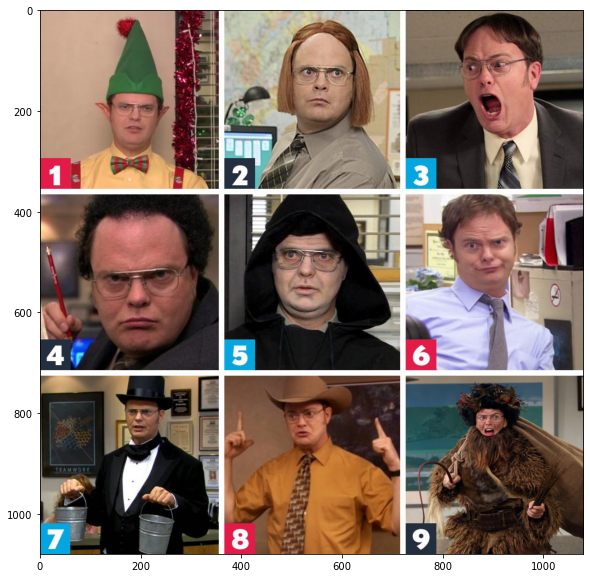

In [18]:
show_image_in_cell(group_image)

### TODO: Detect Face From an Image

In [19]:
# Detect Face from an image
def detect_face_from_any_url(selected_image):
    # Todo: set the face_client.face.detect_with_url object. Make sure to use the 'detection_03' model
    detected_faces = face_client.face.detect_with_url(url=selected_image, detection_model='detection_03')
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(single_image_name))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [20]:
# Define a function to output detected faces
def list_all_faces_from_detected_face_object(detected_faces_object):
    print('We found total {} face(s) in selected face detected object.'.format(str(len(detected_faces_object))))
    for face in detected_faces_object: 
        print (face.face_id)

In [21]:
# Todo: detect and list detected faces in the first image
source_faces_object = detect_face_from_any_url(face_image)
list_all_faces_from_detected_face_object(source_faces_object)

Total face(s) detected  from 1
We found total 1 face(s) in selected face detected object.
6a76e26a-6178-452a-bb0d-9e6cb27b0175


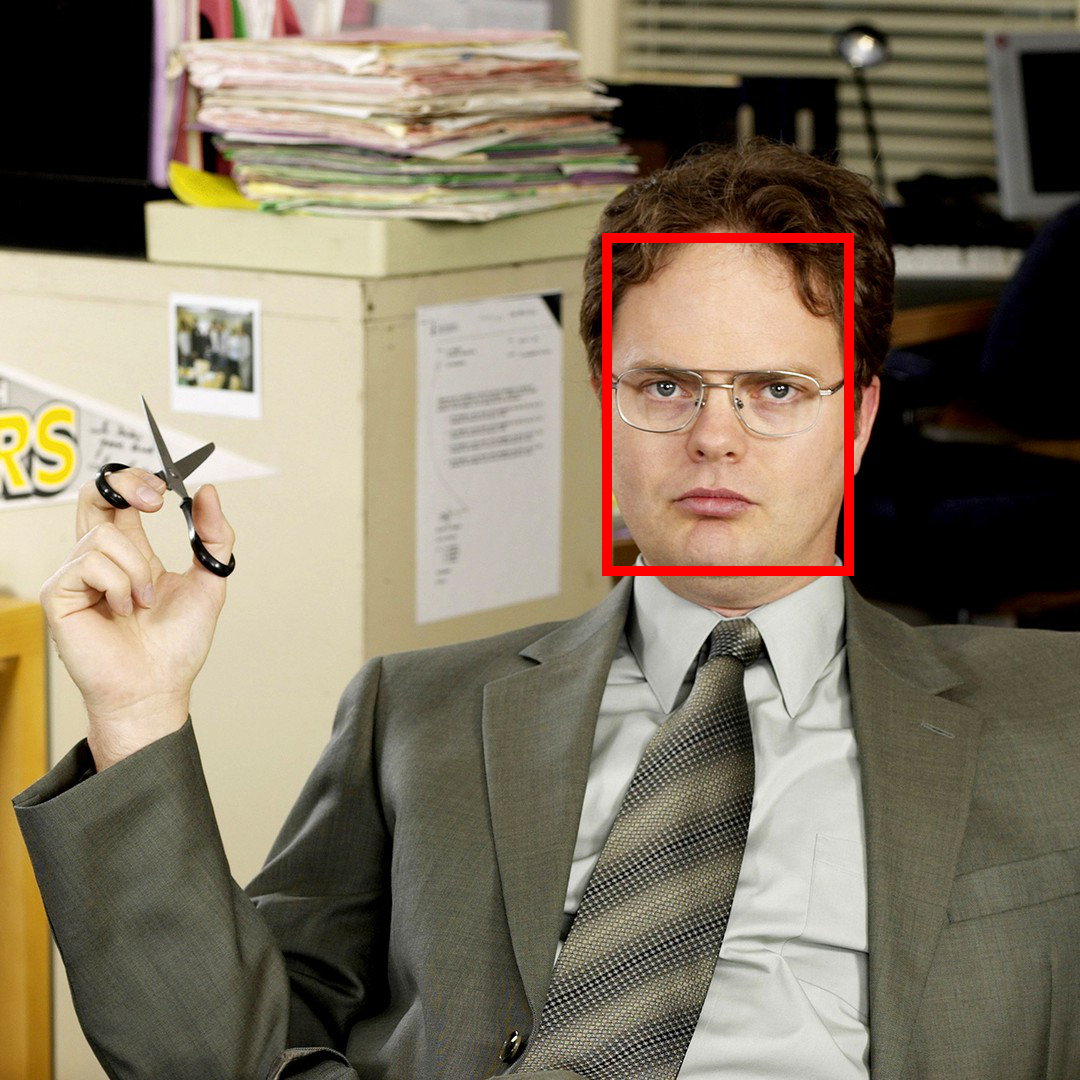

In [22]:
# Draw boxes around the detected faces in the image
drawFaceRectangles(face_image, source_faces_object)

In [23]:
# Todo: detect and list detected faces in the second image
group_faces_object = detect_face_from_any_url(group_image)
list_all_faces_from_detected_face_object(group_faces_object)

Total face(s) detected  from 9
We found total 9 face(s) in selected face detected object.
9f1cb5f5-4bc8-4880-84ed-c3f663272e6b
b7698a82-6df8-40e7-9848-51f93277d95f
7c22068e-cedb-4d11-951f-5883d2203813
a85c13e7-1c32-4f8c-b0d0-11d8a18b30a3
47d2397a-63ce-49d4-b07d-712224a65acc
40e9ef2b-1e4b-455e-8bd2-5498bb9bf645
04e5d746-46f9-4e47-b2f4-08e8b618211a
ebfcfa9a-b7ee-400f-9e8a-ebe67079afc9
25905f63-b1fa-40d0-986f-066a672b9115


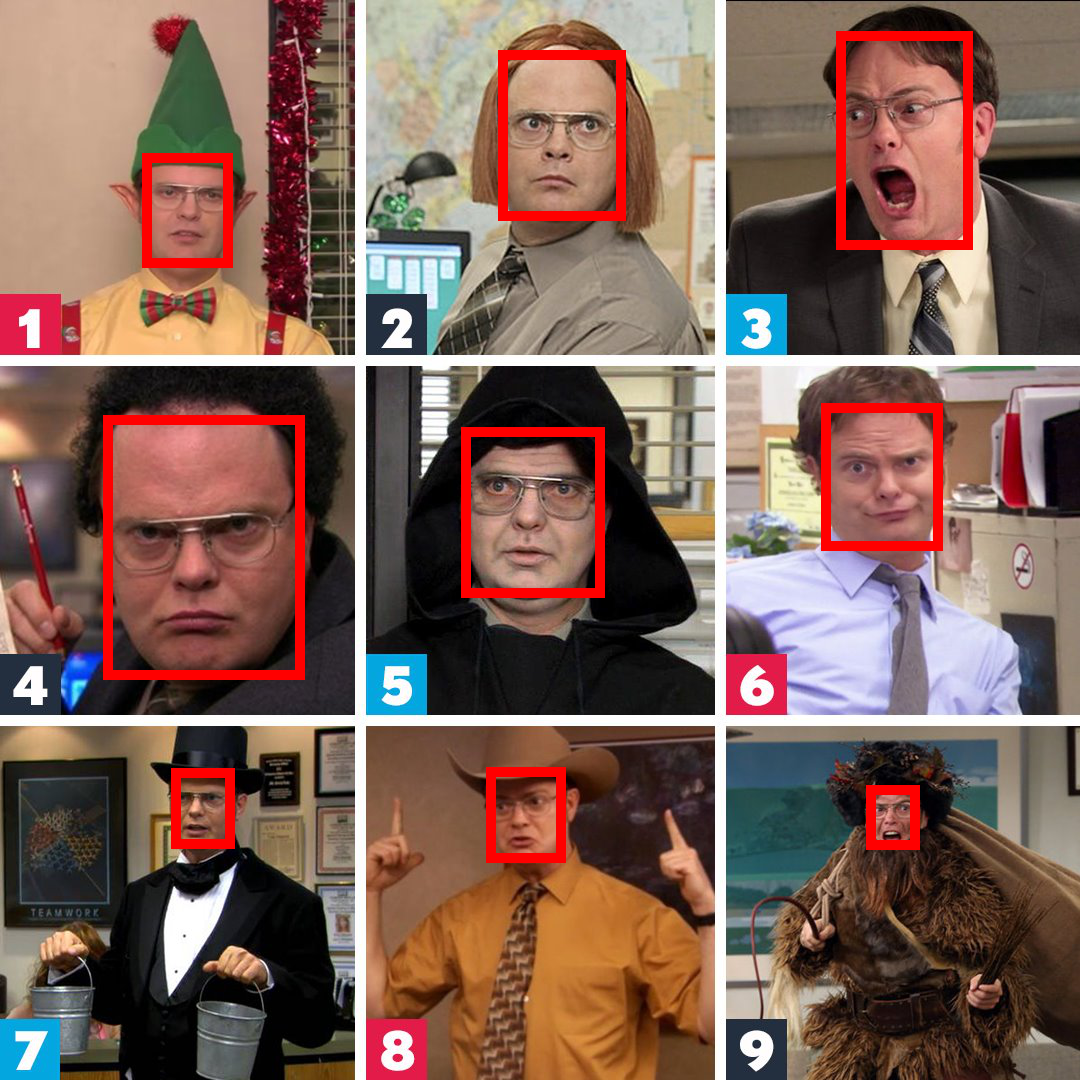

In [24]:
# Draw boxes around the detected faces in the image
drawFaceRectangles(group_image, group_faces_object)

### Set FACE ID

In [25]:
# Source FACE ID
for face in source_faces_object:
    source_image_face_id = face.face_id
print(source_image_face_id)

6a76e26a-6178-452a-bb0d-9e6cb27b0175


In [26]:
# Group FACE ID
group_image_face_IDs_list = list(map(lambda x: x.face_id, group_faces_object))
print('All faces in the group list {}'.format(str(len(group_image_face_IDs_list))))

All faces in the group list 9


### TODO: Find Similar

In [27]:
# Todo: set the face_client.face.find_similar object
similar_faces = face_client.face.find_similar(face_id=source_image_face_id, face_ids=group_image_face_IDs_list)
for similar_face in similar_faces:
    print(similar_face.face_id)

40e9ef2b-1e4b-455e-8bd2-5498bb9bf645
9f1cb5f5-4bc8-4880-84ed-c3f663272e6b
a85c13e7-1c32-4f8c-b0d0-11d8a18b30a3
ebfcfa9a-b7ee-400f-9e8a-ebe67079afc9
b7698a82-6df8-40e7-9848-51f93277d95f
47d2397a-63ce-49d4-b07d-712224a65acc
7c22068e-cedb-4d11-951f-5883d2203813
04e5d746-46f9-4e47-b2f4-08e8b618211a


In [28]:
# Define a function to get get similar face object
def get_similar_face_object(similar_faces, group_faces_object):
    face_info = []
    for face in similar_faces:
        first_image_face_ID = face.face_id
        face_info.extend([x for x in group_faces_object if x.face_id == first_image_face_ID])
    if face_info:
        return face_info
    return None

In [29]:
# Todo: call the function to get get similar face object
similar_face_info = get_similar_face_object(similar_faces, group_faces_object)
similar_face_info

### Show Similar Face

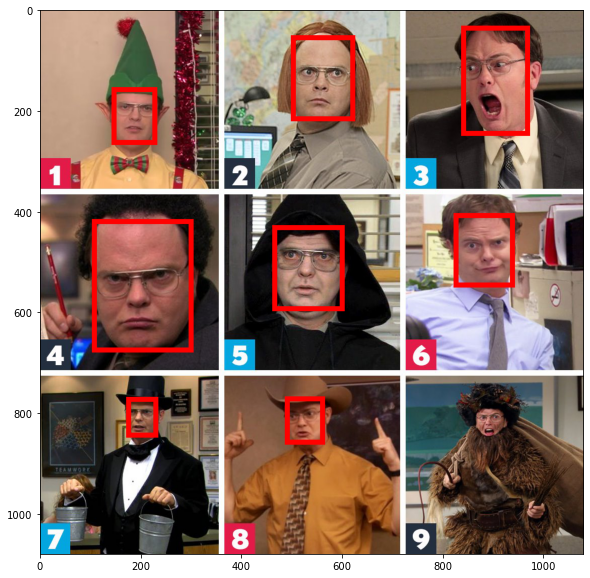

In [30]:
response = requests.get(group_image)
img = Image.open(BytesIO(response.content))
# Draw a red box around every detected faces
draw = ImageDraw.Draw(img)
for similar_face in similar_face_info:
    draw.rectangle(getRectangle(similar_face), outline='red', width = 10)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

## Using Verify API

### TODO: Set The Vefity Object

In [33]:
# Todo: set the face_client.face.verify_face_to_face object to compare the source image face and the similar face
verify_result_same = face_client.face.verify_face_to_face(source_faces_object[0].face_id, group_faces_object[0].face_id)

In [34]:
print('Faces from {} & {} are of the same person, with confidence: {}'.format(face_image, group_image, verify_result_same.confidence))
if verify_result_same.is_identical:
      print("Faces are Similar")
else:
      print('Faces from {} & {} are of a different person, with confidence: {}'.format(face_image, group_image, verify_result_same.confidence))

Faces from https://cdn.theatlantic.com/thumbor/qf3OZxABtwdkxsPxNl_l-pbFyYY=/2733x1:4028x1296/1080x1080/media/img/mt/2020/10/Dwight_comop/original.jpg & https://scontent-ams4-1.xx.fbcdn.net/v/t1.6435-9/71090716_10157702628907422_4297543851175837696_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=730e14&_nc_ohc=azWTzRXciKQAX-My8Ag&_nc_ht=scontent-ams4-1.xx&oh=00_AT_EwliV_HD2khQeOSFTPTO4MVIZW3mw2oEByCldOC6i_Q&oe=62BE987F are of the same person, with confidence: 0.72309
Faces are Similar
